RDKit is a collection of chemoinformatics and machine learning software written in C++ and Python

In [1]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.1 MB 1.4 MB/s 


Imports

In [2]:
import pandas as pd 
from rdkit import Chem, RDLogger
from rdkit.Chem import Descriptors, MolSurf, rdMolDescriptors, AllChem, Crippen, PandasTools, Lipinski

These codes are to be able to import and access google drive files from google colab

In [38]:
from google.colab import files  
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the google drive database

In [19]:
zinc15 = '/content/drive/MyDrive/in-cells.sdf'

Will pull the mols from the in-cells database

In [20]:
all_mols = Chem.SDMolSupplier(zinc15)

Calculate the descriptors for each molecule

In [39]:
all_mols = Chem.SDMolSupplier(zinc15)  # Extraction of mols 
SMILES = []
NumAtoms=[]
ExactMolWt=[]
Mol_LogP = []
NumHAcceptors = []
NumHDonors = []
Ring_Count = []
TPSA =[]
NumRotableBonds = []
Molecular_formula = []
for x in range (0, len(all_mols)):  # The X will go through the condition(if) and run it len(all_mols)
  if all_mols[x] is None: continue  # If the x within all_mols none it will continue and perform the calculations
  NumAtoms.append(all_mols[x].GetNumAtoms())
  SMILES.append(Chem.MolToSmiles(all_mols[x]))
  ExactMolWt.append(Descriptors.ExactMolWt(all_mols[x]))
  TPSA.append(Descriptors.TPSA(all_mols[x]))
  Mol_LogP.append(Crippen.MolLogP(all_mols[x]))
  NumHAcceptors.append(Lipinski.NumHAcceptors(all_mols[x]))
  NumHDonors.append(Lipinski.NumHDonors(all_mols[x]))
  Ring_Count.append(Lipinski.RingCount(all_mols[x]))
  NumRotableBonds.append(Lipinski.NumRotatableBonds(all_mols[x]))
  Molecular_formula.append(rdMolDescriptors.CalcMolFormula(all_mols[x]))

*There was a need to import the database in two different ways and use more than one methodology for calculations. Yes, with the use of the drive, i wasn't having access to the speakers and couldn't find any information. Thanks to PandasTools, reading has become possible.*

Reading the database by direct upload ing to the machine

In [22]:
dataSDF = '/content/drive/MyDrive/in-cells.sdf'

Reads the sdf and transforms the variable into a data frame

In [23]:
ZinC15 = PandasTools.LoadSDF(dataSDF)

,zinc_id,smiles,ID,ROMol
0,ZINC000245189325,O=P(=O)O,,
1,ZINC000029747110,COc1cccc2c1[C@@H]1CN(CCCCn3c(O)nc4c(sc5ncc(-c6...,,
2,ZINC000137550338,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,,
3,ZINC000137550409,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,,
4,ZINC000137550489,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,,
...,...,...,...,...
129560,ZINC000001536786,O=C1CC2(CCCC2)CC(=O)N1CCNC[C@H]1COc2ccccc2O1,,
129561,ZINC000001541570,CCCCCCCCCOc1ccc2[nH]cc(CCN)c2c1,,
129562,ZINC000001069090,COc1cc2c(cc1OC)[C@@]13CCN4CC5=CCO[C@H]6CC(=O)N...,,
129563,ZINC000002000919,COc1ccc([C@H]2CNC(=O)C2)cc1OC1CCCC1,,

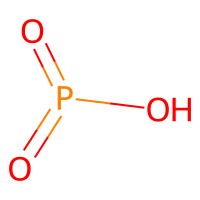
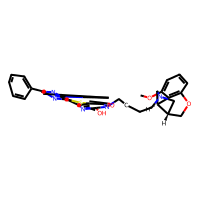
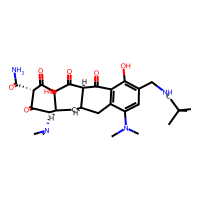
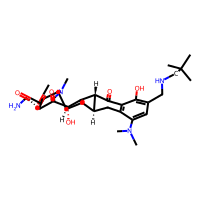
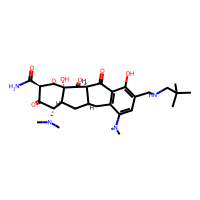
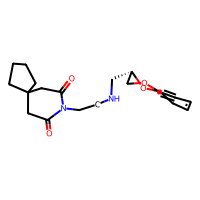
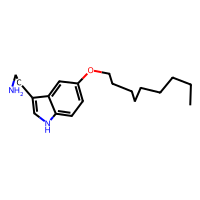
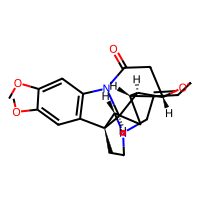
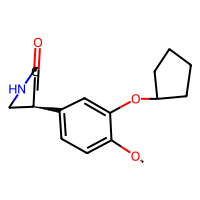
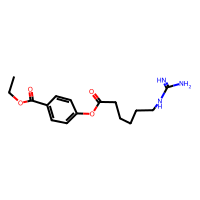

In [24]:
ZinC15

In [32]:
zinc_ID = ZinC15['zinc_id']

In [33]:
zinc_ID

0         ZINC000245189325
1         ZINC000029747110
2         ZINC000137550338
3         ZINC000137550409
4         ZINC000137550489
                ...       
129560    ZINC000001536786
129561    ZINC000001541570
129562    ZINC000001069090
129563    ZINC000002000919
129564    ZINC000002002226
Name: zinc_id, Length: 129565, dtype: object

Dictionary

In [40]:
# Adding lists to a dictionary
i = {'ZinC15_ID': zinc_ID,
     'SMILES': SMILES,
    'MolecularFormula': Molecular_formula,
    'NumAtoms': NumAtoms,
    'ExactMolWt': ExactMolWt,
    'NumRotableBonds': NumRotableBonds,
    'MolLogp': Mol_LogP,
    'RingCount': Ring_Count,
    'NumHAcceptors': NumHAcceptors,
    'TPSA': TPSA,
    'NumHDonors': NumHDonors,

}
# Creating a data frame from dict(i) and turning it into csv
pd.DataFrame(i).to_csv('base de dados.csv', sep = ';')

Making dict in a data frame that can be queried as table

In [41]:
MoleculeDescription = pd.DataFrame(data=i)  

In [37]:
MoleculeDescription

,ZinC15_ID,SMILES,MolecularFormula,NumAtoms,ExactMolWt,NumRotableBonds,MolLogp,RingCount,NumHAcceptors,TPSA,NumHDonors
0,ZINC000245189325,O=P(=O)O,HO3P,4,79.966331,0,0.06660,0,2,54.37,1
1,ZINC000029747110,COc1cccc2c1[C@@H]1CN(CCCCn3c(O)nc4c(sc5ncc(-c6...,C30H29N5O4S,40,555.194025,7,4.67060,7,10,102.60,1
2,ZINC000137550338,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,C29H40N4O7,40,556.289700,6,0.06870,4,10,170.34,4
3,ZINC000137550409,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,C29H40N4O7,40,556.289700,6,0.06870,4,10,170.34,4
4,ZINC000137550489,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,C29H40N4O7,40,556.289700,6,0.06870,4,10,170.34,4
...,...,...,...,...,...,...,...,...,...,...,...
129560,ZINC000001536786,O=C1CC2(CCCC2)CC(=O)N1CCNC[C@H]1COc2ccccc2O1,C20H26N2O4,26,358.189257,5,2.12540,4,5,67.87,1
129561,ZINC000001541570,CCCCCCCCCOc1ccc2[nH]cc(CCN)c2c1,C19H30N2O,22,302.235814,11,4.79850,2,2,51.04,2
129562,ZINC000001069090,COc1cc2c(cc1OC)[C@@]13CCN4CC5=CCO[C@H]6CC(=O)N...,C23H26N2O4,29,394.189257,2,2.10970,7,5,51.24,0
129563,ZINC000002000919,COc1ccc([C@H]2CNC(=O)C2)cc1OC1CCCC1,C16H21NO3,20,275.152144,4,2.62010,3,3,47.56,1
